In [47]:
# Coapplicant income : non normal distribution k normal distribution e anbo

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('loan.csv')

In [50]:
# log function use korbo
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<ipython-input-51-9fcaa1d7fbf1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


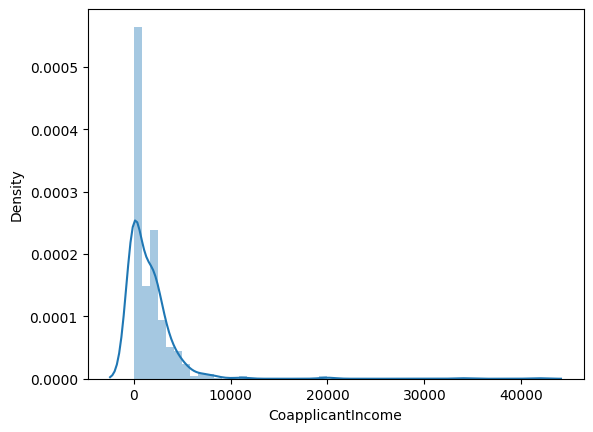

In [51]:
# non gussian distributin -  non normal distribution
sns.distplot(df["CoapplicantIncome"])
plt.show()


In [52]:
# head, tail lomba, outlier ache
# so age outlier remove korte hbe
# IQR method apply korbo
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)

In [53]:
q1, q3

(0.0, 2297.25)

In [54]:
IQR = q3 - q1
IQR

2297.25

In [55]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range,max_range

(-3445.875, 5743.125)

In [56]:
df["CoapplicantIncome"]<=max_range

0      True
1      True
2      True
3      True
4      True
       ... 
609    True
610    True
611    True
612    True
613    True
Name: CoapplicantIncome, Length: 614, dtype: bool

In [57]:
df = df[df["CoapplicantIncome"]<=max_range]

<ipython-input-58-c62ed8ea79a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


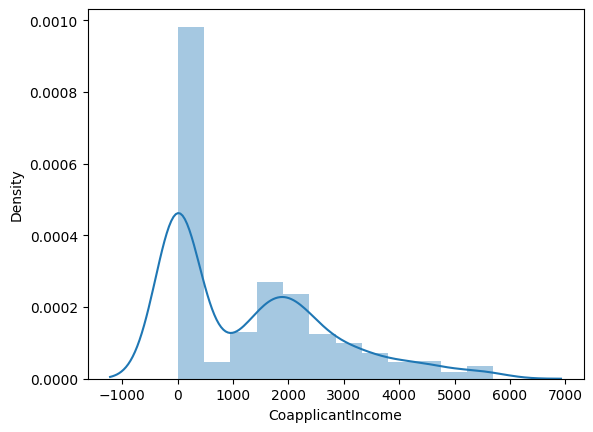

In [58]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

In [59]:
# normal distribution e convert korbo so functional transformation lagbe
from sklearn.preprocessing import FunctionTransformer
import numpy as np #log er jnno lagbe

In [60]:
ft = FunctionTransformer(func = np.log1p)

In [61]:
ft

FunctionTransformer(func=<ufunc 'log1p'>)

In [62]:
# log 1p naki log10 dibo? data 0 diye start hy log0 or e^0 nile undefined hye jay
# so log1p use korbo

In [63]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [64]:
ft.transform(df[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [65]:
df["CoapplicantIncome_tf"] = ft.transform(df[["CoapplicantIncome"]])

<ipython-input-66-445856556ce9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])
<ipython-input-66-445856556ce9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome_tf"])


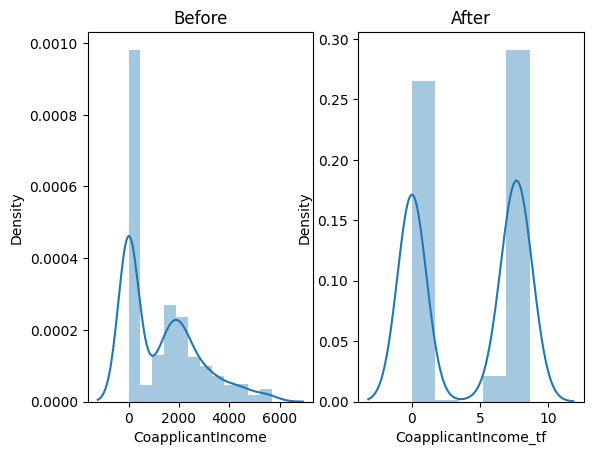

In [66]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["CoapplicantIncome_tf"])
plt.show()

In [67]:
#tail nei
# without outlier eta
# outlier soho niye korle ki hbe? outlier er jnno oita cmnt korte hbe
# without outlier remove kore function transformation use kora jay jdi data loss na korte jai

In [68]:
#func = lambda x: x**2 -->practice

In [69]:
# normal distribution korle machine learning onk time ei better result dey